<a href="https://colab.research.google.com/github/Minnguyen09/HW11/blob/main/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving google_hourly_search_trends.csv to google_hourly_search_trends (2).csv


In [ ]:
df_mercado_trends = pd.read_csv("google_hourly_search_trends.csv", index_col='Date',
    parse_dates=True,
    infer_datetime_format=True)
     

In [ ]:
df_mercado_trends.head()
df_mercado_trends.head(-5)

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 15:00:00,57
2020-09-07 16:00:00,57
2020-09-07 17:00:00,61


In [ ]:
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [ ]:
hv.extension('bokeh')

In [ ]:
df_may_2020 = df_mercado_trends.loc['2020-05']

In [ ]:
hv.extension('bokeh')

df_may_2020.hvplot()


In [ ]:

traffic_may_2020 = df_may_2020.sum()

traffic_may_2020

Search Trends    38181
dtype: int64

In [ ]:
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

median_monthly_traffic
     

Search Trends    35172.5
dtype: float64

In [ ]:
print(f'The ratio of May 2020 traffic to overall traffic is: {traffic_may_2020 / median_monthly_traffic}')
print(f'MercadoLibre May 2020: {traffic_may_2020}')
print(f'MercadoLibre Median Monthly {median_monthly_traffic}')
     

The ratio of May 2020 traffic to overall traffic is: Search Trends    1.085536
dtype: float64
MercadoLibre May 2020: Search Trends    38181
dtype: int64
MercadoLibre Median Monthly Search Trends    35172.5
dtype: float64


In [ ]:
hv.extension('bokeh')

df_mercado_trends_day = df_mercado_trends['Search Trends'].groupby(by=[df_mercado_trends.index.dayofweek]).mean()
df_mercado_trends_day.hvplot()

In [ ]:
hv.extension('bokeh')

hv.extension('bokeh')

df_mercado_trends.hvplot.heatmap(
    x='index.hour', 
    y='index.dayofweek', 
    cmap="reds",
    xlabel="Hourly",
    ylabel="Day of Week",
    C="Search Trends").aggregate(function=np.mean)

In [ ]:
hv.extension('bokeh')

weekofyear = df_mercado_trends.groupby(by=[df_mercado_trends.index.weekofyear]).mean()
weekofyear.hvplot()

In [ ]:
df_mercado_stock = pd.read_csv(
    "mercado_stock_price.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True,
).dropna()

df_mercado_stock.head(5)

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


In [ ]:
hv.extension('bokeh')


df_mercado_stock['close'].hvplot()

In [ ]:
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

mercado_stock_trends_df

,close,Search Trends
2016-06-01 09:00:00,135.160,6.0
2016-06-01 10:00:00,136.630,12.0
2016-06-01 11:00:00,136.560,22.0
2016-06-01 12:00:00,136.420,33.0
2016-06-01 13:00:00,136.100,40.0
...,...,...
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0


In [ ]:
first_half_2020 = mercado_stock_trends_df.loc["2020-01":"2020-06"]

first_half_2020

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0
...,...,...
2020-06-30 11:00:00,976.170,17.0
2020-06-30 12:00:00,977.500,27.0
2020-06-30 13:00:00,973.230,37.0
2020-06-30 14:00:00,976.500,45.0


In [ ]:
hv.extension('bokeh')

first_half_2020.hvplot(shared_axes=False, subplots=True).cols(1)

In [ ]:
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df["Search Trends"].shift(1)

In [ ]:
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()

mercado_stock_trends_df.tail(5)

,close,Search Trends,Lagged Search Trends,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566


In [ ]:
hv.extension('bokeh')

mercado_stock_trends_df["Stock Volatility"].hvplot()

In [ ]:
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df["close"].pct_change()

In [ ]:
mercado_stock_trends_df

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.160,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.630,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.560,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.420,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.100,40.0,33.0,0.006134,-0.002346
...,...,...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552


In [ ]:
mercado_stock_trends_df[["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


In [ ]:
mercado_prophet_df = df_mercado_trends.reset_index()

mercado_prophet_df.columns = ['ds', 'y']

mercado_prophet_df = mercado_prophet_df.dropna()


In [ ]:
model_mercado_trends = Prophet()
model_mercado_trends

In [ ]:
model_mercado_trends.fit(mercado_prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpch41_e9_/vliyovdo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpch41_e9_/wnzcbr4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20279', 'data', 'file=/tmp/tmpch41_e9_/vliyovdo.json', 'init=/tmp/tmpch41_e9_/wnzcbr4m.json', 'output', 'file=/tmp/tmpch41_e9_/prophet_model1ova0cxl/prophet_model-20230314140554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

future_mercado_trends

,ds
0,2016-06-01 00:00:00
1,2016-06-01 01:00:00
2,2016-06-01 02:00:00
3,2016-06-01 03:00:00
4,2016-06-01 04:00:00
...,...
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00


In [ ]:
forecast = model_mercado_trends.predict(future_mercado_trends)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.273500,80.716492,98.190534,44.273500,44.273500,45.290820,45.290820,45.290820,41.452721,...,1.860346,1.860346,1.860346,1.977752,1.977752,1.977752,0.0,0.0,0.0,89.564320
1,2016-06-01 01:00:00,44.274505,77.491044,94.034835,44.274505,44.274505,41.736647,41.736647,41.736647,37.943554,...,1.810263,1.810263,1.810263,1.982830,1.982830,1.982830,0.0,0.0,0.0,86.011152
2,2016-06-01 02:00:00,44.275511,67.823052,84.021414,44.275511,44.275511,31.413187,31.413187,31.413187,27.656623,...,1.768689,1.768689,1.768689,1.987876,1.987876,1.987876,0.0,0.0,0.0,75.688698
3,2016-06-01 03:00:00,44.276516,52.003521,68.520393,44.276516,44.276516,16.145999,16.145999,16.145999,12.417392,...,1.735716,1.735716,1.735716,1.992891,1.992891,1.992891,0.0,0.0,0.0,60.422515
4,2016-06-01 04:00:00,44.277521,35.517069,51.601010,44.277521,44.277521,-0.968848,-0.968848,-0.968848,-4.678022,...,1.711300,1.711300,1.711300,1.997874,1.997874,1.997874,0.0,0.0,0.0,43.308673


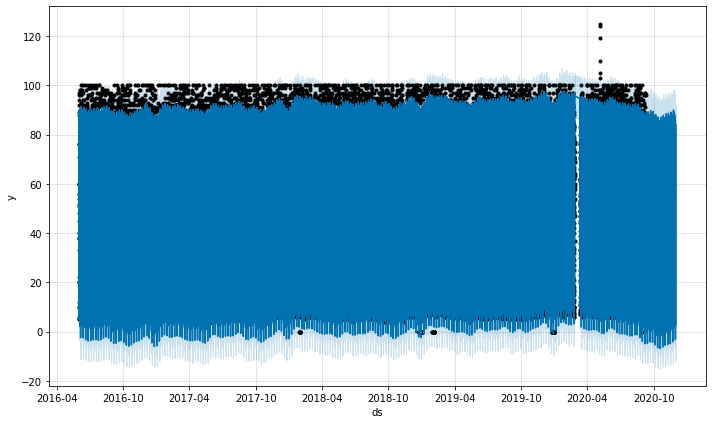

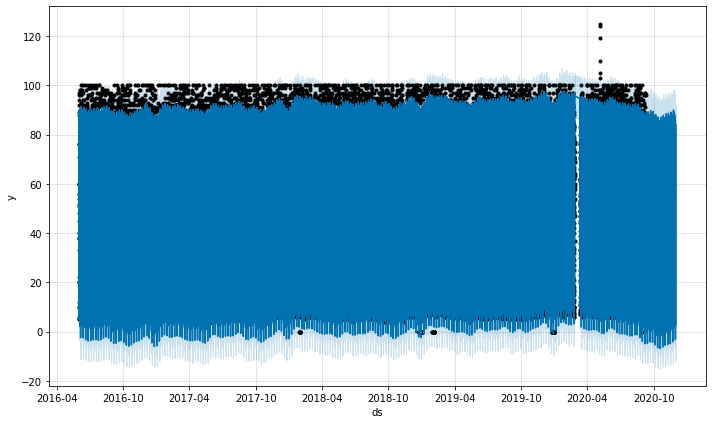

In [ ]:
model_mercado_trends.plot(forecast)

In [ ]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
0,89.564320,80.716492,98.190534
1,86.011152,77.491044,94.034835
2,75.688698,67.823052,84.021414
3,60.422515,52.003521,68.520393
4,43.308673,35.517069,51.601010


In [ ]:
hv.extension('bokeh')

forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].hvplot()

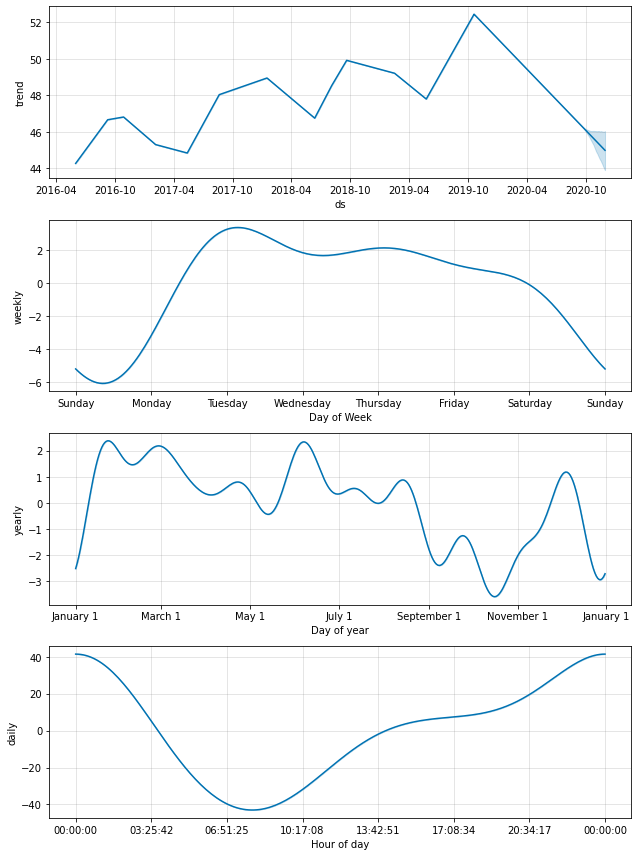

In [ ]:
forecast = forecast.reset_index()
forecast.head()

figures_mercado_trends = model_mercado_trends.plot_components(forecast)